In [1]:
#LA2
"""Data Wrangling II
Create an “Academic performance” dataset of students and perform the following
operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution"""

'Data Wrangling II\nCreate an “Academic performance” dataset of students and perform the following\noperations using\nPython.\n1. Scan all variables for missing values and inconsistencies. If there are missing values\nand/or\ninconsistencies, use any of the suitable techniques to deal with them.\n2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable\ntechniques to deal with them.\n3. Apply data transformations on at least one of the variables. The purpose of this\ntransformation should be one of the following reasons: to change the scale for better\nunderstanding of the variable, to convert a non-linear relation into a linear one, or to\ndecrease the skewness and convert the distribution into a normal distribution'

In [2]:
# Importing libraries
import pandas as pd
import numpy as np

In [3]:
# Read csv file into a pandas dataframe
df = pd.read_csv("C:\\Users\\rhuta\Downloads\\academic_data.csv - academic_data.csv.csv")
df

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88,90.0,92
1,SA,Dixit,F,90.0,90,94.0,95
2,AB,Danial,M,NaN,na,100.0,80
3,DA,Kapoor,M,95.0,86,500.0,82
4,SA,Jha,F,NaN,84,98.0,84
5,WS,Thakur,F,87.0,NaN,97.0,86
6,DY,Kapoor,M,81.0,80,96.0,89
7,JK,Khanna,F,40.0,88,95.0,87
8,RT,Pardesi,M,10.0,96,94.0,88
9,UV,Pardesi,M,9.0,NaN,93.0,96


In [4]:
# Prints out the first few rows
print(df.head())

  Firstname Lastname Gender  SPOS DSBDA     WT  DA
0        LA      Roy      M  85.0    88   90.0  92
1        SA    Dixit      F  90.0    90   94.0  95
2        AB   Danial      M   NaN    na  100.0  80
3        DA   Kapoor      M  95.0    86  500.0  82
4        SA      Jha      F   NaN    84   98.0  84


In [5]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("C:\\Users\\rhuta\Downloads\\academic_data.csv - academic_data.csv.csv")

In [6]:
#print gender again
print(df['Gender'].head(10))

0    M
1    F
2    M
3    M
4    F
5    F
6    M
7    F
8    M
9    M
Name: Gender, dtype: object


In [7]:
# NaN values are marked True
print(df['Gender'].isnull().head(10))
# NaN values are marked False
print(df['Gender'].notnull().head(10))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Gender, dtype: bool
0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: Gender, dtype: bool


In [8]:
# notnull will return False for all NaN values
null_filter = df['Gender'].notnull()
# prints only those rows where null_filter is True
print(df[null_filter])
print(df.isnull().values.any())

   Firstname Lastname Gender   SPOS DSBDA     WT   DA
0         LA      Roy      M   85.0    88   90.0   92
1         SA    Dixit      F   90.0    90   94.0   95
2         AB   Danial      M    NaN    na  100.0   80
3         DA   Kapoor      M   95.0    86  500.0   82
4         SA      Jha      F    NaN    84   98.0   84
5         WS   Thakur      F   87.0   NaN   97.0   86
6         DY   Kapoor      M   81.0    80   96.0   89
7         JK   Khanna      F   40.0    88   95.0   87
8         RT  Pardesi      M   10.0    96   94.0   88
9         UV  Pardesi      M    9.0   NaN   93.0   96
10        MN    Desai      F  200.0    87    NaN  N.A
11        BC    Patel      F  300.0   NaN   88.0  300
True


In [9]:
# drop all rows with NaN values
df.dropna(axis=0,inplace=True)

In [10]:
# drop all rows with atleast one NaN
new_df = df.dropna(axis = 0, how ='any') 

In [11]:
# drop all rows with all NaN
new_df = df.dropna(axis = 0, how ='all')

In [12]:
# drop all columns with atleast one NaN
new_df = df.dropna(axis = 1, how ='any')

In [13]:
# drop all columns with all NaN
new_df = df.dropna(axis = 1, how ='all')

In [14]:
#Imputing Missing Values in our Dataset
#There are many options to pick from when replacing a missing value:
#A single pre-decided constant value, such as 0.
#Taking value from another randomly selected sample.
#Mean, median, or mode for the column.
#Interpolate value using a predictive model.

In [15]:
#Replacing NaNs with a single constant value

In [16]:
df['SPOS'].fillna(0, inplace=True)
# To check changes call
print(df['SPOS'].head(10))

0    85.0
1    90.0
3    95.0
6    81.0
7    40.0
8    10.0
Name: SPOS, dtype: float64


In [17]:
#Replacing NaNs with the value from the previous row or the next row
#method = 'pad’ for taking values from the previous row
df['DSBDA'].fillna(method='pad', inplace=True)
print(df['SPOS'].head(10))

0    85.0
1    90.0
3    95.0
6    81.0
7    40.0
8    10.0
Name: SPOS, dtype: float64


In [18]:
# We use method = 'bfill’ for taking values from the next row.
df['SPOS'].fillna(method='bfill', inplace=True)
print(df['SPOS'].head(10))

0    85.0
1    90.0
3    95.0
6    81.0
7    40.0
8    10.0
Name: SPOS, dtype: float64


In [19]:
#2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
#techniques to deal with them. 

In [20]:
import matplotlib.pyplot as plt

In [21]:
df.head()

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88,90.0,92
1,SA,Dixit,F,90.0,90,94.0,95
3,DA,Kapoor,M,95.0,86,500.0,82
6,DY,Kapoor,M,81.0,80,96.0,89
7,JK,Khanna,F,40.0,88,95.0,87


In [22]:
df.shape

(6, 7)

{'whiskers': [<matplotlib.lines.Line2D at 0x234d75ad820>,
 'caps': [<matplotlib.lines.Line2D at 0x234d75ade80>,
 'boxes': [<matplotlib.lines.Line2D at 0x234d75ad550>],
 'medians': [<matplotlib.lines.Line2D at 0x234d95cb3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x234d95cb670>],
 'means': []}

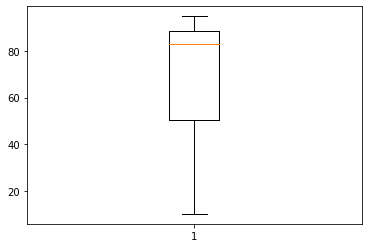

In [23]:
plt.boxplot(x=df['SPOS'])